<a href="https://colab.research.google.com/github/NguyenBaPhat/final_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Đây là các hằng số và biến được sử dụng để xác định tập dữ liệu hình ảnh và tham số mô hình cho một mạng thần kinh tích chập.
batch_size = 64
img_height = 150
img_width = 150
train_set = pathlib.Path('/content/drive/MyDrive/dataset/final_project_dataset/training_set')
val_set = pathlib.Path('/content/drive/MyDrive/dataset/final_project_dataset/test_set')

In [4]:

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_set,
  validation_split=0,               #Tham số `validation_split` được đặt thành 0, có nghĩa là tất cả hình ảnh trong thư mục sẽ được sử dụng để đào tạo hoặc xác thực.
  seed=123,                          #Tham số `seed` được đặt thành 123 để đảm bảo rằng cùng một phân chia ngẫu nhiên được sử dụng mỗi khi mã được chạy.
  image_size=(img_height, img_width),   # chỉ định chiều cao và chiều rộng của hình ảnh trong bộ dữ liệu
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_set,
  validation_split=0,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [5]:
#danh sách tên lớp cho tập dữ liệu hình ảnh.
class_names = train_ds.class_names
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

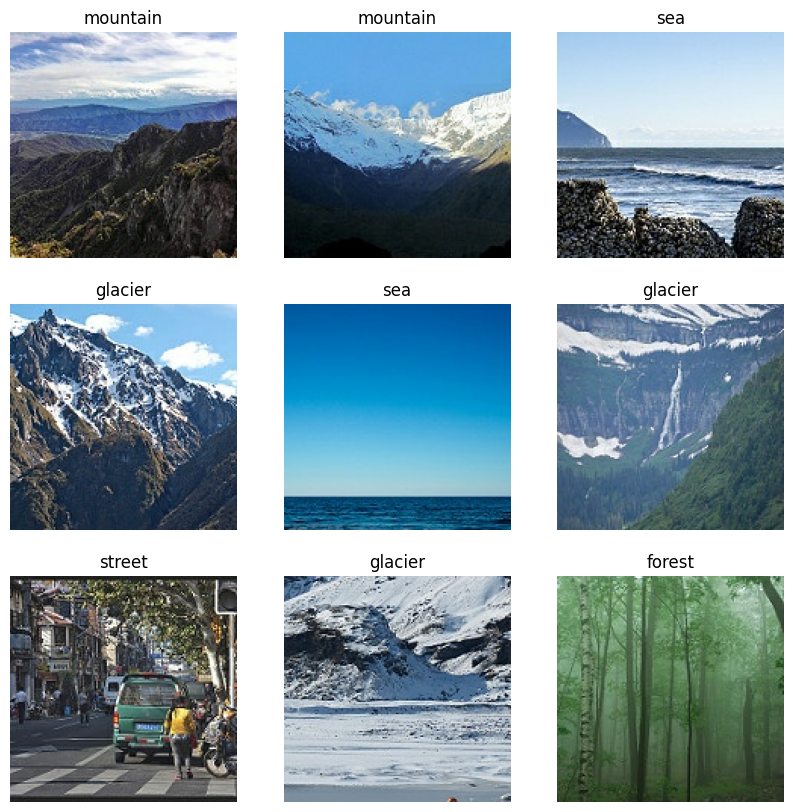

In [ ]:
#xem hình ảnh của các lớp 
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [6]:

#Tạo model CNN
# mô hình bao gồm các lớp Conv2D, MaxPooling2D, BatchNormalization, Dropout và một lớp Dense để đưa ra dự đoán.

# Các lớp Conv2D và MaxPooling2D được sử dụng để trích xuất các đặc trưng của ảnh, trong đó Conv2D áp dụng các bộ lọc để tìm
#ra các đặc trưng và MaxPooling2D 
#giảm kích thước của đầu vào. BatchNormalization được sử dụng để đưa các giá trị đầu vào về cùng một phân phối,
#giúp tăng tốc độ huấn luyện và giảm độ phức tạp

# của mô hình. Dropout được sử dụng để giảm overfitting bằng cách loại bỏ một số nơron ngẫu nhiên trong quá trình huấn luyện.

# Sau đó, mô hình sử dụng một lớp Dense với hàm kích hoạt softmax để tính toán xác suất phân loại cho ảnh vào mỗi lớp.

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),
    Dense(6, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
220/220 [==============================] - 30s 122ms/step - loss: 0.2204 - accuracy: 0.9259 - val_loss: 0.7092 - val_accuracy: 0.8073
Epoch 2/20
220/220 [==============================] - 27s 121ms/step - loss: 0.2132 - accuracy: 0.9271 - val_loss: 0.8085 - val_accuracy: 0.7953
Epoch 3/20
220/220 [==============================] - 27s 120ms/step - loss: 0.2147 - accuracy: 0.9312 - val_loss: 1.2392 - val_accuracy: 0.7873
Epoch 4/20
220/220 [==============================] - 27s 120ms/step - loss: 0.2094 - accuracy: 0.9282 - val_loss: 2.9166 - val_accuracy: 0.6457
Epoch 5/20
220/220 [==============================] - 27s 122ms/step - loss: 0.1791 - accuracy: 0.9374 - val_loss: 0.9409 - val_accuracy: 0.8060
Epoch 6/20
220/220 [==============================] - 27s 118ms/step - loss: 0.1606 - accuracy: 0.9453 - val_loss: 0.8325 - val_accuracy: 0.8023
Epoch 7/20
220/220 [==============================] - 27s 122ms/step - loss: 0.1490 - accuracy: 0.9483 - val_loss: 0.9506 - val_ac

In [ ]:
#Lưu lại model dưới dạng file h5 
model.save('/content/drive/MyDrive/dataset/final_project_dataset/finalmodel.h5')

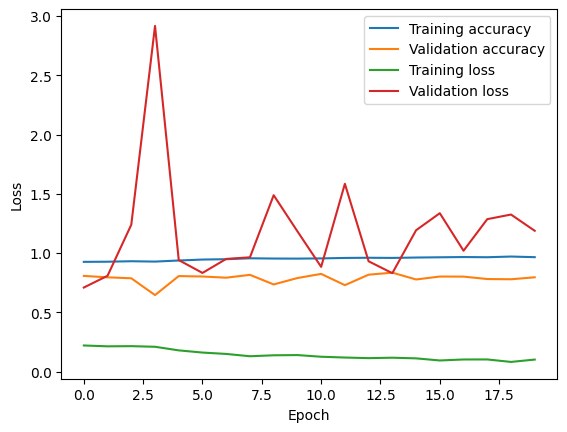

In [ ]:

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Prediction

first image to predict
actual label: street
2/2 [==============================] - 0s 8ms/step
predicted label: street


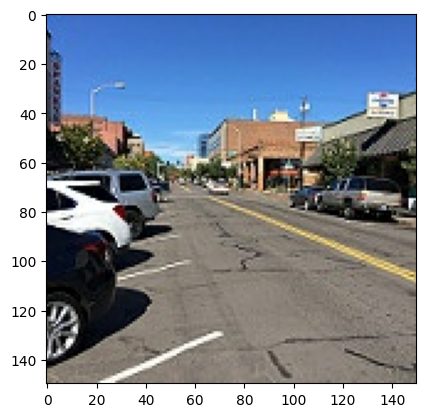

In [ ]:
#dự đoán nhãn của hình ảnh đầu tiên trong bộ dữ liệu xác thực bằng cách sử dụng
# Đầu tiên, nó trích xuất hình ảnh đầu tiên và nhãn của nó từ lô tập dữ liệu xác thực, chuyển đổi 
# hình ảnh thành một mảng có nhiều mảng và hiển thị nó bằng matplotlib. Sau đó, nó sử dụng mô hình được đào tạo để
# dự đoán nhãn của hình ảnh và in cả nhãn thực và nhãn dự đoán.
import numpy as np
for images_batch, labels_batch in val_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])